# Explainable AI using SHAP

## Understanding the Problem Statement --------Problem Scoping

The California housing dataset to predict the housing price based on the input features.

The 1990 California Census dataset to study and try to understand how the different attributes can affect the house price predicition.

### Import the useful Packages & Libraries

In [1]:
!pip install shap 

In [2]:
#  we can import the California Housing dataset directly from the sklearn library and train any model,
#  such as a Random Forest Regressor
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

shap is the Python package for SHAP (SHapley Additive exPlanations), which is a popular library for explaining machine learning models' predictions. It provides a way to understand how features contribute to a model's predictions.
Reference - https://shap.readthedocs.io/en/stable/

pandas is a widely-used Python library for data manipulation and analysis. It is commonly used for handling and processing datasets.
Reference - https://pandas.pydata.org/docs/

RandomForestRegressor is a machine learning model from Scikit-learn (sklearn.ensemble) that is used for regression tasks. Random forests are an ensemble learning method based on decision trees.
Reference - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## Dataset: Data Acquisition
Source - https://www.kaggle.com/datasets/camnugent/california-housing-prices The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

In [3]:
# We can have a first look at the available description

dataset = fetch_california_housing(as_frame = True)
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Displaying top 5 rows of dataset
dataset.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


# Building a Model ------ Modeling 

Classification and regression are two fundamental tasks in supervised machine learning. They involve predicting an output based on input features, but they are used for different types of problems and have distinct objectives:

Classification:

Objective: In classification, the goal is to assign input data points to predefined categories or classes. It's used when the output variable is categorical in nature. Output: The output of a classification model is a discrete label or class. For example, it could be used to predict whether an email is spam or not (binary classification) or to classify images of animals into different species (multi-class classification). Examples: Logistic Regression, Decision Trees, Support Vector Machines, and Neural Networks are common algorithms used for classification tasks. Evaluation: Classification models are evaluated using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

Regression:

Objective: In regression, the goal is to predict a continuous numeric value or quantity. It's used when the output variable is continuous and can take any value within a range. Output: The output of a regression model is a numeric value. For example, it could be used to predict house prices based on features like size, location, and number of bedrooms. Examples: Linear Regression, Decision Tree Regression, Random Forest Regression, and Gradient Boosting Regression are common algorithms used for regression tasks. Evaluation: Regression models are evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score. Here's a simple example to illustrate the difference:

Classification: Given a dataset of emails, classify each email as either "spam" or "not spam." The output is a discrete label, either "spam" (class 1) or "not spam" (class 0).

Regression: Given a dataset of houses with features like size, location, and number of bedrooms, predict the price of each house. The output is a continuous numeric value (e.g., $300,000).

Classification deals with categorizing data into predefined classes, while regression deals with predicting numeric values. The choice between classification and regression depends on the nature of the problem and the type of output variable you are trying to predict. For more details watch - https://www.youtube.com/watch?v=xYJEM2C0G5Q

In [6]:
# Features and Target Variable

X = dataset['data']
y = dataset['target']

# Training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()

# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

The RandomForestRegressor is a machine learning model provided by the scikit-learn library (also known as sklearn) for regression tasks. It is an ensemble learning method based on decision trees. RandomForestRegressor is a versatile model that can be used for various regression tasks, and the choice of hyperparameters should be based on the specific problem and dataset you are working with.

Here's the official documentation for RandomForestRegressor in scikit-learn for more detailed information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# SHAP values

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. Reference https://shap.readthedocs.io/en/latest/
https://www.youtube.com/watch?v=L8_sVRhBDLU
https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454

In [7]:
# To compute SHAP values for the model, we need to create an Explainer object and use it
# to evaluate a sample or the fulldataset:

# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 2065it [15:34,  2.20it/s]                                                                             


The shap_values variable will have three attributes: .values, .base_values and .data.

The .data attribute is simply a copy of the input data, .base_values is the expected value of the target or the average target value of all the train data, and .values are the SHAP values for each example.

In [8]:
shap_values

.values =
array([[ 0.42119225, -0.00898444,  0.03191923, ..., -0.24417626,
         0.28401461, -0.19718844],
       [ 0.55369387,  0.07303397,  0.06276497, ..., -0.13443296,
         0.35150556,  0.08549477],
       [ 0.79574996, -0.05604838,  0.08710738, ..., -0.16843673,
        -0.47770924,  0.1927123 ],
       ...,
       [ 0.22126997,  0.00595144, -0.04876986, ..., -0.28815534,
         0.20683455,  0.02897817],
       [-0.06943836, -0.06794368,  0.01177041, ..., -0.24169606,
        -0.50319859, -0.17927337],
       [ 0.60705853, -0.00549026, -0.012711  , ...,  0.22337145,
        -0.064604  ,  0.32107864]])

.base_values =
array([2.10813872, 2.10813872, 2.10813872, ..., 2.10813872, 2.10813872,
       2.10813872])

.data =
array([[   5.2037    ,   25.        ,    5.88593156, ...,    3.08365019,
          33.9       , -117.85      ],
       [   5.444     ,   37.        ,    5.92277992, ...,    2.8996139 ,
          34.        , -118.4       ],
       [   5.9617    ,   26.        

# For analysis of the global effect of the features we can use the following plots.

# Bar plot
https://www.youtube.com/watch?v=L8_sVRhBDLU

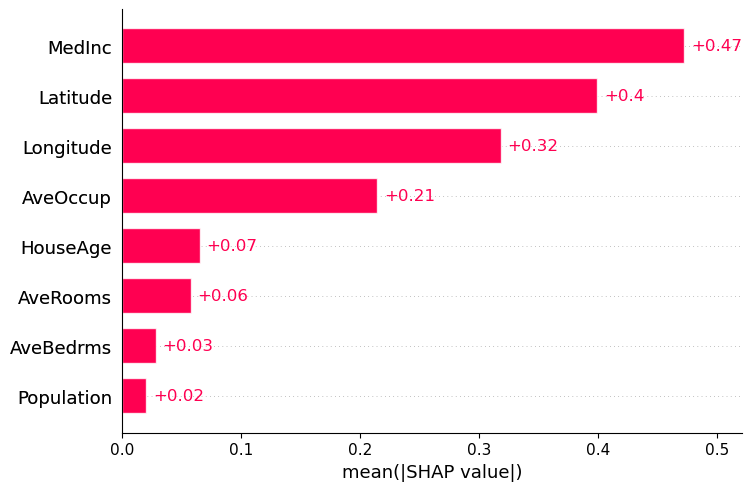

In [9]:
shap.plots.bar(shap_values)


Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

# Summary plot: beeswarm
https://www.youtube.com/watch?v=L8_sVRhBDLU 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


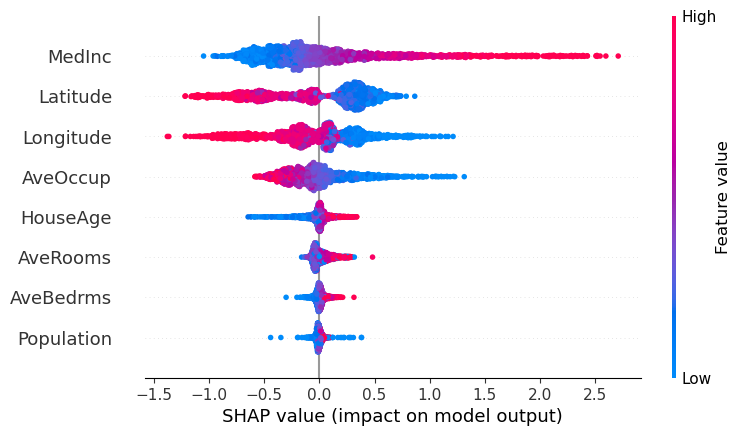

In [10]:
shap.plots.beeswarm(shap_values)

All the little dots on the plot represent a single observation. The horizontal axis represents the SHAP value, while the color of the point shows us if that observation has a higher or a lower value, when compared to other observations.

In this example, higher latitudes and longitudes have a negative impact on the prediction, while lower values have a positive impact.

For analysis of local, instance-wise effects, we can use the following plots on single observations (in the examples below I used shap_values[0]).

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


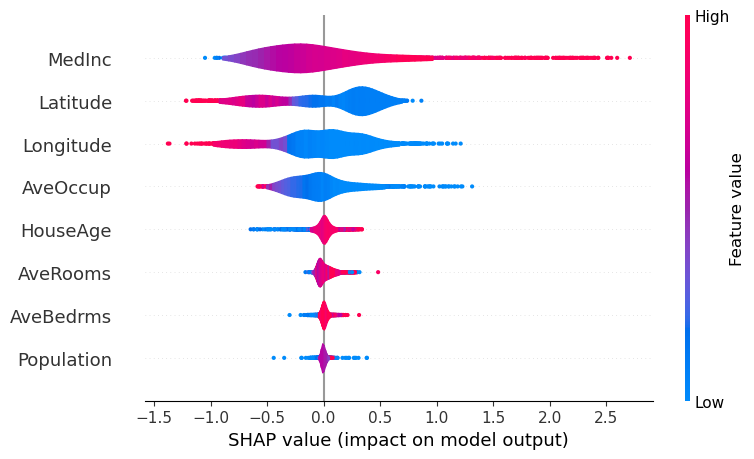

In [11]:
shap.summary_plot(shap_values, plot_type='violin')

# Dependency plot
https://www.youtube.com/watch?v=L8_sVRhBDLU

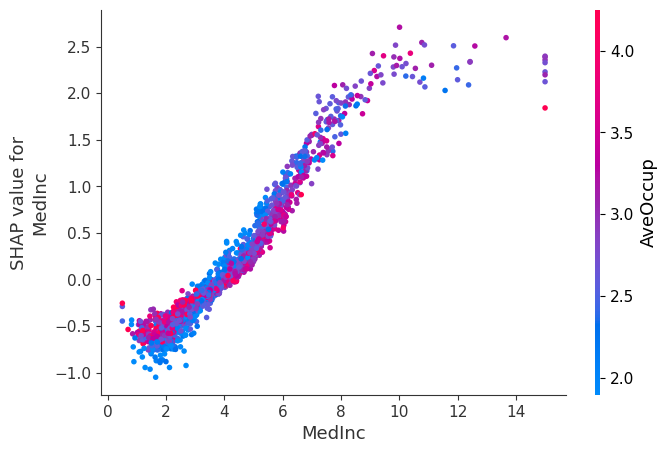

In [12]:
shap.dependence_plot(0, shap_values.values, X_test, interaction_index=5)

# Local bar plot
https://www.youtube.com/watch?v=L8_sVRhBDLU

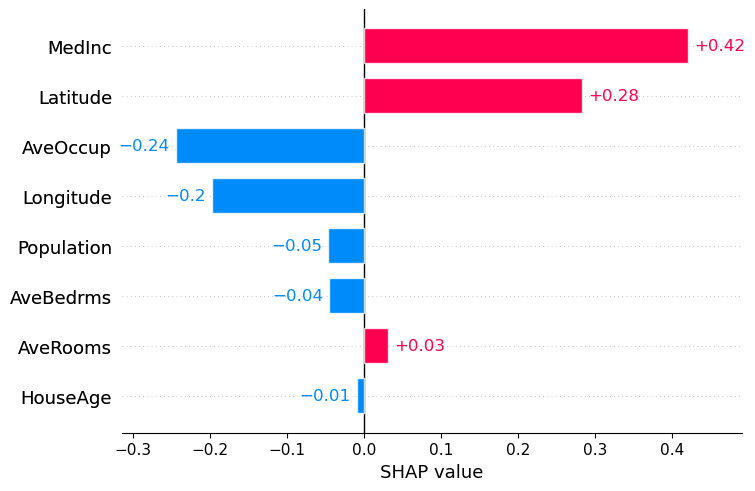

In [13]:
shap.plots.bar(shap_values[0])

This plot shows us what are the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature.

# Waterfall plot
https://www.youtube.com/watch?v=L8_sVRhBDLU

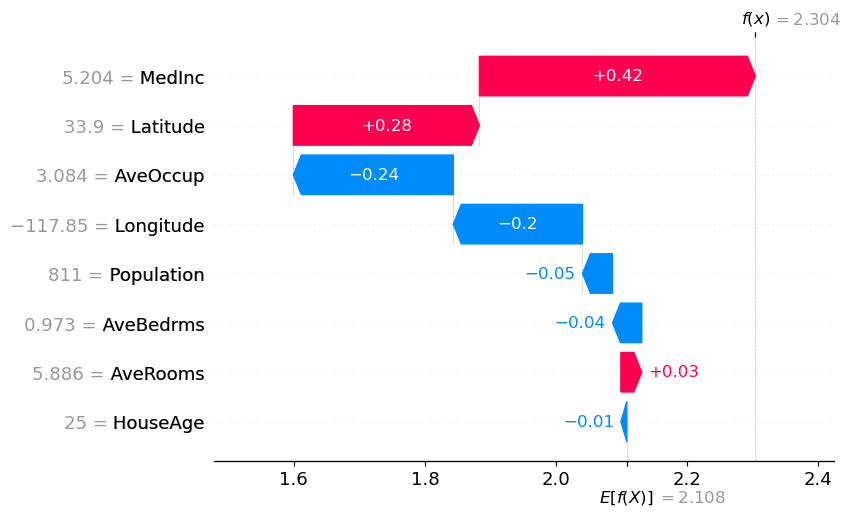

In [14]:
shap.plots.waterfall(shap_values[0])

The waterfall plot has the same information, represented in a different manner. Here we can see how the sum of all the SHAP values equals the difference between the prediction f(x) and the expected value E[f(x)].

# Force plot
https://www.youtube.com/watch?v=L8_sVRhBDLU

In [15]:
shap.initjs()
shap.force_plot(shap_values[0])

The force plot is another way to see the effect each feature has on the prediction, for a given observation. In this plot the positive SHAP values are displayed on the left side and the negative on the right side, as if competing against each other. The highlighted value is the prediction for that observation.

## Conclusion:

1. MedInc is the feature with the highest impact on predicition 
2. Higher latitudes and longitudes have a negative impact on the prediction, while lower values have a positive impact.
